# **BLACK-SCHOLES MODEL**
[Black-Scholes model basics](https://www.investopedia.com/terms/b/blackscholes.asp)

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 500.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 13.1 MB/s eta 0:00:00
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting u

**IMPORTING THE LIBRARIES**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from datetime import date

import warnings
warnings.filterwarnings("ignore")

# to fetch data 
import yfinance as yf

import scipy.stats as ss

**IMPORTING DATA**

In [4]:
symbol = 'AAPL'
end = date.today()
start = end.replace(year = 2022)

tickerData = yf.Ticker(symbol)

# Read data 
df = tickerData.history(period='1d', start=start, end=end, interval = '1d')


df.tail()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-03-02 00:00:00-05:00,144.380005,146.710007,143.899994,145.910004,52238100,0.0,0.0
2023-03-03 00:00:00-05:00,148.039993,151.110001,147.330002,151.029999,70668500,0.0,0.0
2023-03-06 00:00:00-05:00,153.789993,156.300003,153.460007,153.830002,87558000,0.0,0.0
2023-03-07 00:00:00-05:00,153.699997,154.029999,151.130005,151.600006,56182000,0.0,0.0
2023-03-08 00:00:00-05:00,152.809998,153.470001,151.830002,152.869995,47129000,0.0,0.0


In [5]:
symbol = 'AAPL'  #the ticker of the stock whose data is to be taken out
dfo = yf.Ticker(symbol)

In [6]:
dfo.options  #to get the date of different expiration time

('2023-03-10',
 '2023-03-17',
 '2023-03-24',
 '2023-03-31',
 '2023-04-06',
 '2023-04-14',
 '2023-04-21',
 '2023-05-19',
 '2023-06-16',
 '2023-07-21',
 '2023-08-18',
 '2023-09-15',
 '2023-10-20',
 '2023-12-15',
 '2024-01-19',
 '2024-03-15',
 '2024-06-21',
 '2024-09-20',
 '2025-01-17',
 '2025-06-20',
 '2025-12-19')

In [7]:
dfo_exp = dfo.option_chain(dfo.options[1])  #you can change index to try on different expiry dates

In [8]:
dfo_exp.calls.head() #data for call options

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL230317C00035000,2023-03-08 20:34:58+00:00,35.0,117.35,0.0,0.0,0.0,0.0,4.0,583,0.00001,True,REGULAR,USD
1,AAPL230317C00040000,2023-03-01 15:21:26+00:00,40.0,106.00,0.0,0.0,0.0,0.0,1.0,465,0.00001,True,REGULAR,USD
2,AAPL230317C00045000,2023-02-21 19:21:55+00:00,45.0,104.10,0.0,0.0,0.0,0.0,32.0,34,0.00001,True,REGULAR,USD
3,AAPL230317C00050000,2023-02-23 19:15:00+00:00,50.0,98.80,0.0,0.0,0.0,0.0,152.0,148,0.00001,True,REGULAR,USD
4,AAPL230317C00055000,2023-02-21 19:57:30+00:00,55.0,93.85,0.0,0.0,0.0,0.0,2.0,13,0.00001,True,REGULAR,USD


# **CALCULATION OF ANNUAL VOLATALITY**
Annual volatility of the stock can be calculated as:

Calculating daily logarithmic returns

Then calculating its standard deviation to get daily volatility

Then multiplying it by sqrt(252) as there are 252 trading days in a year.

In [9]:
def annual_vol(df):
    """
    Function to calculate annual volatility
    
    Parameters
    ----------
    df : dataframe
         Stock info

    Returns
    -------
    vol : float
        annual volatility of the stock
    """
    
    log_return = np.log(df['Close']) - np.log(df['Close'].shift(1))
    log_return = log_return[1:]  #to remove nan 
    daily_vol = log_return.std()
    vol = daily_vol*(252**0.5)
    
    return vol

In [10]:
vol = annual_vol(df)
vol

0.352606983172078

# **BLACK-SCHOLES MODEL**


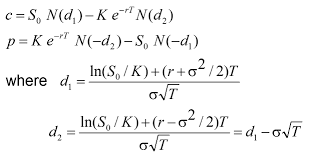

C : call option price

P : Put option price

S : Stock price

K : Strike price

r : risk free rate

t : time of maturity in year

N = Normal distribution

In [11]:
def euro_vanilla(S, K, T, r, sigma, option = 'call'):
    """
    To calculate options price with the help of black-scholes model
    
    Parameters
    ----------
    S : float
        The price of the underlying
    
    K : float
        Strike price of the option
        
    T : float
        Time to expiry in years
        
    r : float
        Risk free rate which can be taken as the US Treasury bond yield
        
    sigma : float
        The annual volatility of the returns
        
    option : string
        call for call option
        put for put option
    
    Returns
    -------
    premium : float
        The price of call or put option
    """
    
    
    d1 = (np.log(S/K) + (r + sigma**2 / 2) * T)/(sigma * np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    
    if option == 'call':
        premium = S * ss.norm.cdf(d1) - K * np.exp(-r * T) * ss.norm.cdf(d2)
    if option == 'put':
        premium =  K * np.exp(-r * T) * ss.norm.cdf(-d2) - S * ss.norm.cdf(-d1)
        
    return premium

In [12]:
N = 100
T = 8.0/365      #Calculate the number of days left for expiry from your calculation in years
t = T/N       

In [15]:
#r is the risk free rate taken from the 10 years us treasury bond
#call price calculated from black scholes model
call = {}
for K in dfo_exp.calls['strike']:
    call_price = euro_vanilla(S = df['Close'][len(df)-1], K = K, T = T, r=0.0123*t, sigma=vol)
  # print(call_price)
    call[K] = call_price
th_call = pd.DataFrame.from_dict(call, orient='index')
th_call.rename(columns = {0:"th_call"}, inplace = True)
th_call.head()

,th_call
35.0,117.869997
40.0,112.869997
45.0,107.869998
50.0,102.869998
55.0,97.869998


In [16]:
#actual call price
ac_call = dfo_exp.calls.loc[:, ['strike', 'lastPrice']]
ac_call.set_index('strike', inplace = True)
ac_call.rename(columns = {"lastPrice":"ac_call"}, inplace=True)
ac_call.head()

,ac_call
strike,
35.0,117.35
40.0,106.00
45.0,104.10
50.0,98.80
55.0,93.85


In [17]:
call = th_call
call["ac_call"] = ac_call
call.head(10)

,th_call,ac_call
35.0,117.869997,117.35
40.0,112.869997,106.00
45.0,107.869998,104.10
50.0,102.869998,98.80
55.0,97.869998,93.85
60.0,92.869999,87.71
65.0,87.869999,87.40
70.0,82.869999,83.99
75.0,77.870000,80.54
80.0,72.870000,72.90


<AxesSubplot:>

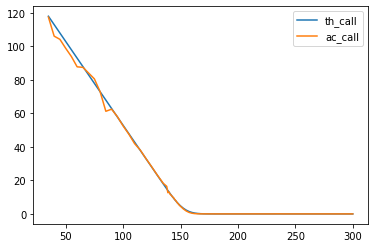

In [18]:
call.plot() #plotting the actual and theoretical call prices

In [19]:
#r is the risk free rate taken from the 10 years us treasury bond
#theoretical put price calculated from black scholes model
put = {}
for K in dfo_exp.puts['strike']:
    put_price = euro_vanilla(S = df['Close'][len(df)-1], K = K, T = T, r=0.0158*t, sigma=vol, option = 'put')
  # print(put_price)
    put[K] = put_price
th_put = pd.DataFrame.from_dict(put, orient='index')
th_put.rename(columns = {0:"th_put"}, inplace = True)
th_put.head()

,th_put
35.0,1.240803e-176
40.0,1.435686e-146
45.0,2.104436e-122
50.0,1.184940e-102
55.0,2.646757e-86


In [20]:
#actual put price
ac_put = dfo_exp.puts.loc[:, ['strike', 'lastPrice']]
ac_put.set_index('strike', inplace = True)
ac_put.rename(columns = {"lastPrice":"ac_put"}, inplace=True)
ac_put.head()

,ac_put
strike,
35.0,0.01
40.0,0.01
45.0,0.01
50.0,0.01
55.0,0.01


In [21]:
put = th_put
put["ac_put"] = ac_put
put.tail(10)

,th_put,ac_put
235.0,82.129987,80.35
240.0,87.129987,86.08
245.0,92.129986,89.25
250.0,97.129986,95.10
260.0,107.129985,133.70
270.0,117.129984,122.00
275.0,122.129984,119.65
280.0,127.129984,137.95
290.0,137.129983,134.77
300.0,147.129982,143.90


<AxesSubplot:>

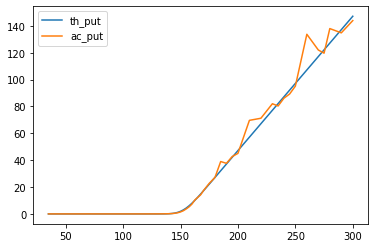

In [22]:
put.plot()

# **PUT-CALL PARITY**






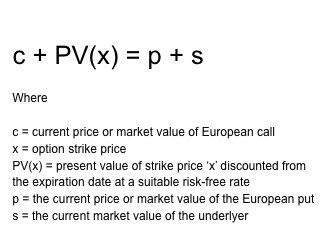

In [23]:
data = pd.concat([call, put], axis=1)

In [24]:
data

,th_call,ac_call,th_put,ac_put
35.0,1.178700e+02,117.35,1.240803e-176,0.01
40.0,1.128700e+02,106.00,1.435686e-146,0.01
45.0,1.078700e+02,104.10,2.104436e-122,0.01
50.0,1.028700e+02,98.80,1.184940e-102,0.01
55.0,9.787000e+01,93.85,2.646757e-86,0.01
...,...,...,...,...
270.0,5.718232e-28,0.01,1.171300e+02,122.00
275.0,1.106731e-29,0.01,1.221300e+02,119.65
280.0,2.042907e-31,0.01,1.271300e+02,137.95
290.0,6.126178e-35,0.01,1.371300e+02,134.77


In [25]:
data.dropna(inplace = True)
data.head()

,th_call,ac_call,th_put,ac_put
35.0,117.869997,117.35,1.240803e-176,0.01
40.0,112.869997,106.00,1.435686e-146,0.01
45.0,107.869998,104.10,2.104436e-122,0.01
50.0,102.869998,98.80,1.184940e-102,0.01
55.0,97.869998,93.85,2.646757e-86,0.01


In [26]:
data["PV(K)"] = data.index
data["PV(K)"] = data["PV(K)"]*np.exp(-0.0158*t)

In [27]:
data["Spot Price"] = df["Close"][len(df)-1]
data.head()

,th_call,ac_call,th_put,ac_put,PV(K),Spot Price
35.0,117.869997,117.35,1.240803e-176,0.01,34.999879,152.869995
40.0,112.869997,106.00,1.435686e-146,0.01,39.999861,152.869995
45.0,107.869998,104.10,2.104436e-122,0.01,44.999844,152.869995
50.0,102.869998,98.80,1.184940e-102,0.01,49.999827,152.869995
55.0,97.869998,93.85,2.646757e-86,0.01,54.999810,152.869995


In [28]:
put_call_parity = data["th_call"] - data["th_put"] - data["Spot Price"] + data["PV(K)"]

<AxesSubplot:>

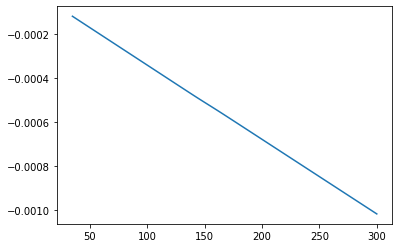

In [29]:
put_call_parity.plot()

In [30]:
put_call_parity = data["ac_call"] - data["ac_put"] - data["Spot Price"] + data["PV(K)"]

<AxesSubplot:>

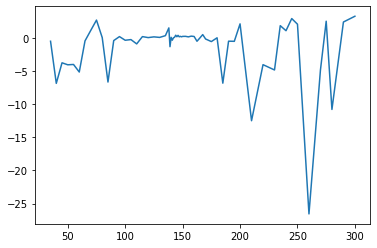

In [31]:
put_call_parity.plot()

The put-call parity in the actual market may not hold good because of the difference in supply and demand thus opening up the arbitrage opportunity for the traders. But this oppportunity is for very low time and mostly occurs in less volume options, i.e., deep in the money or deep out of money options.